# K-means clustering

## Exploratory data analysis: mall customer segmentation data (kaggle)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df1 = pd.read_csv("The Muggle Sorting Hat DataSet.csv")
df1["Gender"] = df1["Gender"].str.replace(" ", "")
df1["District"] = df1["District"].str.replace(" ", "")
df1["Name"] = df1["Name"].str.replace(" ", "")
df1["Friend 1"] = df1["Friend 1"].str.replace(" ", "")
df1["Friend 2 "] = df1["Friend 2 "].str.replace(" ", "")
df1.rename(columns = {"Friend 2 ":"Friend 2"}, inplace = True)
df1.head()

,Name,Gender,Age,District,Friend 1,Friend 2
0,BettyAllison,female,10,Pandora,MollyMeer,JessicaZebra
1,PeterAlexs,male,10,Limsa,G�ntherCohl,CeasarFeige
2,GregorAllmann,male,11,Pandora,BertEdamer,CeasarFeige
3,TiffanyBecks,female,10,Pandora,AllyInka,SallyBrot
4,SallyBrot,female,10,Limsa,TiffanyBecks,BettyAllison


In [2]:
#df1.rename(columns = {"Annual Income (k$)":"Income", "Spending Score (1-100)":"Spending Score"}, inplace = True)
#df1.head()

In [3]:
df1.describe()

,Age
count,80.000000
mean,10.112500
std,0.317974
min,10.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,11.000000


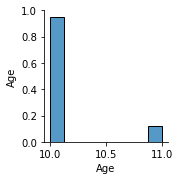

In [4]:
sns.pairplot(df1[["Age", "District", "Gender"]])

In [5]:
df1["District"].value_counts()

Pandora       19
Uldah         17
Limsa         15
Queensdale    11
Gridania      11
Reach          7
Name: District, dtype: int64

In [6]:
dic = {"Pandora" : "0", "Uldah" : "1", "Limsa" : "2", "Queensdale" : "3", "Gridania" : "4", "Reach" : "5"}
dic2 = {"female" : "0", "male" : "1"}

for old, new in dic.items():
    df1['District'] = df1['District'].str.replace(old, new, regex=False)

for old, new in dic2.items():
    df1['Gender'] = df1['Gender'].str.replace(old, new, regex=False)

df1['District'] = df1['District'].astype(int)
df1['Gender'] = df1['Gender'].astype(int)

In [7]:
df1.head()
df1["Gender"].value_counts()

1    41
0    39
Name: Gender, dtype: int64

## Clustering mall customer segmentation data

In [8]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
kmeans = kmeans.fit(df1[["District", "Gender"]])
kmeans.cluster_centers_

array([[ 2.54545455e+00, -1.11022302e-16],
       [ 4.38888889e+00,  5.55555556e-01],
       [ 0.00000000e+00,  2.63157895e-01],
       [ 1.00000000e+00,  6.47058824e-01],
       [ 2.33333333e+00,  1.00000000e+00]])

In [9]:
df1["Clusters"] = kmeans.labels_
df1.head(10)

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,2
1,PeterAlexs,1,10,2,G�ntherCohl,CeasarFeige,4
2,GregorAllmann,1,11,0,BertEdamer,CeasarFeige,2
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,2
4,SallyBrot,0,10,2,TiffanyBecks,BettyAllison,0
5,NancyClick,0,11,1,ZoeJutter,AmandaFredericks,3
6,G�ntherCohl,1,10,1,CeasarFeige,PeterAlexs,3
7,JohnnyCedar,1,10,4,MarvinGeige,LeoJackson,1
8,MathildaDamm,0,10,2,YuleHoffnung,ZoeJutter,0
9,BertEdamer,1,10,1,PeterAlexs,G�ntherCohl,3


In [10]:
df1["Clusters"].value_counts()

2    19
1    18
3    17
4    15
0    11
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='District'>

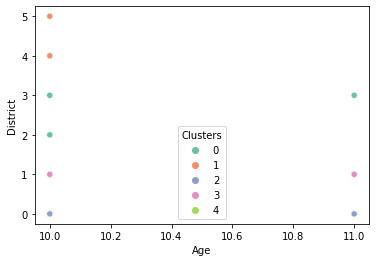

In [11]:
sns.scatterplot(data = df1, x = "Age", y = "District", hue = "Clusters", palette = "Set2")

## Creating diverse customer groups

In [12]:
"""
First function creates list a of clustered dataframes (one df per cluster); second function takes list a,
splits clustered dataframes into required number of diverse groups (splits) and adds them to list b; third function 
combines splitted dataframes in list b into new (diverse) dataframes and adds them to list c.
"""
#from functools import reduce

def create_clustered_dataframes(df):
    dataframes = []
    for i in df.Clusters.unique():
        temporary_df = df[df["Clusters"] == i]
        dataframes.append(temporary_df)
    return dataframes

clustered_dataframes = create_clustered_dataframes(df1)
clustered_dataframes[0]


,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,2
2,GregorAllmann,1,11,0,BertEdamer,CeasarFeige,2
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,2
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,2
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,2
19,YuleHoffnung,0,10,0,ZoeJutter,AmandaFredericks,2
22,ZoeJutter,0,10,0,YuleHoffnung,SallyBrot,2
24,LeoJackson,1,10,0,JohnnyCedar,MaxJovus,2
30,ArnoKrys,1,10,0,VictorSalat,LeoJackson,2
38,MollyMeer,0,11,0,MillyMucks,BettyAllison,2


In [13]:
def split_dataframes(clustered_list, splits):
    dataframes_split = []
    for i in clustered_list: 
        index_to_split = (-(-len(i)//splits))
        start = 0
        end = index_to_split
        for split in range(splits):
            temporary_df = i.iloc[start:end, :]
            dataframes_split.append(temporary_df)
            start += index_to_split
            end += index_to_split
    return dataframes_split

split_clustered_dataframes = split_dataframes(clustered_dataframes, 4)
split_clustered_dataframes[0]


,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,2
2,GregorAllmann,1,11,0,BertEdamer,CeasarFeige,2
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,2
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,2
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,2


In [14]:
"""
Splits in split_dataframes_by_position has to be the same as splits in create_diverse_dataframes!
"""

def create_diverse_dataframes(split_list, splits):
    dataframes_diverse = []
    start = 0
    for split in range(splits):        
        if start <= splits - 1:
            new_dataframe_as_list = split_list[start::splits]
            new_dataframe = pd.concat(new_dataframe_as_list)
            dataframes_diverse.append(new_dataframe)
            start += 1
    return dataframes_diverse    
    
diverse_groups = create_diverse_dataframes(split_clustered_dataframes, 5)
diverse_groups[0].head(15)

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,2
2,GregorAllmann,1,11,0,BertEdamer,CeasarFeige,2
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,2
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,2
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,2
25,HankKalt,1,10,3,BasOffen,ColeMaas,4
26,MaxKaal,1,11,3,AlexanderOdele,BillyNozzle,4
27,TrevorKehl,1,10,2,HankKalt,ColeMaas,4
35,ColeMaas,1,10,3,CarlosVives,BasOffen,4
54,AmoraPeer,0,11,3,GeorgiaPammen,VivianKratz,0


## Visualising diverse groups

In [15]:
group = diverse_groups[0]
#sns.scatterplot(data = group, x = "Income", y = "Spending Score", hue = "Clusters", palette = "Set2")

In [16]:
for group_temp in diverse_groups:
    print(group_temp["Clusters"].value_counts())
    print(len(group_temp))

2    5
4    4
0    3
3    2
Name: Clusters, dtype: int64
14
1    5
2    5
4    4
0    2
Name: Clusters, dtype: int64
16
1    5
2    5
3    5
4    3
Name: Clusters, dtype: int64
18
1    5
3    5
2    4
0    3
Name: Clusters, dtype: int64
17
3    5
4    4
0    3
1    3
Name: Clusters, dtype: int64
15


Problem: Groups are too different in size!

## Creating diverse customer groups (different approach)

In [17]:
def sort_dataframe(df):
    df["Clusters"] = pd.Categorical(df["Clusters"], [0, 1, 2, 3, 4])
    sorted_dataframe = df.sort_values("Clusters")
    return sorted_dataframe

sort_dataframe(df1).head()

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
8,MathildaDamm,0,10,2,YuleHoffnung,ZoeJutter,0
77,JessieSnape,0,10,2,MathildaDamm,StefanieFluss,0
54,AmoraPeer,0,11,3,GeorgiaPammen,VivianKratz,0
67,AmelieReid,0,10,3,TheaRekle,AmoraPeer,0
4,SallyBrot,0,10,2,TiffanyBecks,BettyAllison,0


## Keeping two customers together: merging rows before clustering
    

In [18]:
df2 = df1.drop("Clusters", axis=1)

def merge_customers1(df, id1, id2):
    customer1 = df[df["CustomerID"] == id1]
    customer2 = df[df["CustomerID"] == id2]
    customer_id = [customer1.iloc[0,0], customer2.iloc[0,0]]
    average_age = (customer1.iloc[0,2] + customer2.iloc[0,2])/2
    average_income = (customer1.iloc[0,3] + customer2.iloc[0,3])/2
    average_spending_score = (customer1.iloc[0,4] + customer2.iloc[0,4])/2
    gender = [customer1.iloc[0,1], customer2.iloc[0,1]]
    merged_c = pd.DataFrame({"CustomerID": [customer_id],
                                      "Gender": [gender],
                                      "Age": [average_age],
                                      "Income": [average_income],
                                      "Spending Score": [average_spending_score]})
    return merged_c


#merge_customers1(df2, 1, 2)

In [19]:
def merge_customers2(df, id1, id2):
    customer1 = df[df["CustomerID"] == id1]
    customer2 = df[df["CustomerID"] == id2]
    customer_id = [customer1.iloc[0,0], customer2.iloc[0,0]]
    age = [customer1.iloc[0,2], customer2.iloc[0,2]]
    income = [customer1.iloc[0,3], customer2.iloc[0,3]]
    spending_score = [customer1.iloc[0,4], customer2.iloc[0,4]]
    gender = [customer1.iloc[0,1], customer2.iloc[0,1]]
    merged_c = pd.DataFrame({"CustomerID": [customer_id],
                                      "Gender": [gender],
                                      "Age": [age],
                                      "Income": [income],
                                      "Spending Score": [spending_score]})
    return merged_c


#merge_customers2(df2, 1, 200)

In [20]:
df4 = pd.DataFrame()
#for number in range(1, 101):
    #df_temp = df4.append(merge_customers1(df2, number, 100+number))
    #df4 = df_temp
print(df4)
print(len(df4))

Empty DataFrame
Columns: []
Index: []
0


In [21]:
#sns.pairplot(df4[["Age", "Income", "Spending Score"]])

## Clustering students based on network communities

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def read_csv():
    df = pd.read_csv("new_df_friends_small.csv", index_col=[0])
    return df

orig_df = read_csv()
len(orig_df)
orig_df

,id,previous_class_int,color_int,gender_int,reading_int,hobby_int,language_int,introverted_int,siblings,friend1,friend2
6,6,0,0,0,0,0,0,0,1,86,86
9,9,0,1,0,1,1,1,1,1,126,86
86,86,0,2,0,2,2,2,0,0,146,146
94,94,0,2,0,0,1,2,1,0,6,121
103,103,0,2,0,3,0,2,0,0,6,86
...,...,...,...,...,...,...,...,...,...,...,...
75,75,9,5,1,2,0,1,0,0,102,67
100,100,9,3,1,0,3,2,0,2,145,40
102,102,9,3,1,1,4,3,0,1,40,100
131,131,9,3,1,3,3,1,1,4,67,102


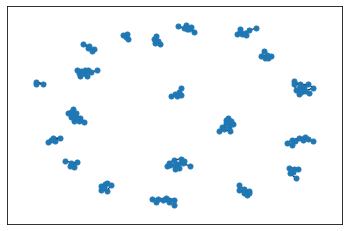

In [11]:
# visualise network of paired students

import networkx as nx

G_symmetric = nx.Graph()

for index, row in orig_df.iterrows():
    G_symmetric.add_edge(row["id"], row["friend1"])
    G_symmetric.add_edge(row["id"], row["friend2"])

nx.random_layout(G_symmetric)
nx.draw_networkx(G_symmetric, node_size = 25, with_labels = False)
plt.show()

In [6]:
# extract communities of students and add to list

import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

def extract_comm(res_number):
    orig_df = read_csv()
    G_symmetric = nx.Graph()
    for index, row in orig_df.iterrows():
        G_symmetric.add_edge(row["id"], row["friend1"])
        G_symmetric.add_edge(row["id"], row["friend2"])
    c = list(greedy_modularity_communities(G_symmetric, resolution = res_number))
    return c

d = extract_comm(12)

print(len(sorted(d[0])))
print(sorted(d[3]))

# check number of items in list, problem : new nodes are created
x = 0
for e in d:
    for i in e:
        x += 1
print(x)

8
[26, 53, 70, 87, 98, 110, 143, 148]
150


In [5]:
# check percentage of wishes granted

id1 = list(orig_df["id"])
id2 = list(orig_df["friend1"])
id3 = list(orig_df["friend2"])

ideal_groups = [*map(list, zip(id1, id2, id3))]

x = 0

for community in d:
    for group in ideal_groups:    
        if(set(group).issubset(set(community))):
            x += 1

print(x)
print(x / len(ideal_groups) * 100)
        

107
71.33333333333334


In [7]:
# turn each community of students into one row in dataframe

def merge_students(res):
    df = read_csv()
    list_sets = extract_comm(res) # resolution set here
    list_df = []
    for set_students in list_sets:
        mask = df["id"].isin(set_students)
        df_set = df.loc[mask]
        temp_df = pd.DataFrame({"id": [set_students],
                                "number_students": [len(set_students)],
                                "gender_int": [round(df_set["gender_int"].mean(), 1)],
                                "color_int": [round(df_set["color_int"].mean(), 1)],
                                "reading_int": [round(df_set["reading_int"].mean(), 1)],
                                "hobby_int": [round(df_set["hobby_int"].mean(), 1)],
                                "language_int": [round(df_set["language_int"].mean(), 1)],
                                "introverted_int": [round(df_set["introverted_int"].mean(), 1)],
                                "siblings": [round(df_set["siblings"].mean(), 1)],
                                "previous_class_int": [round(df_set["previous_class_int"].mean(), 1)]})
        list_df.append(temp_df)
    merged_communities = pd.concat(list_df, ignore_index=True)
    return merged_communities
        
df_merged_students = merge_students(1)
#df_merged_students.head()


## k-means clustering of student groups

Text(0, 0.5, 'Sum of Squared Distances')

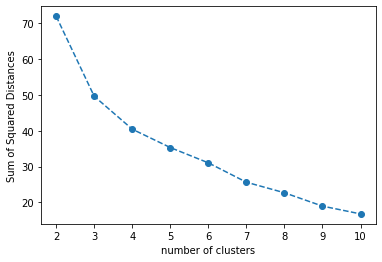

In [8]:
# find ideal number of clusters for k-means clustering

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import sklearn.cluster as cluster


list_inertia = []

for i in range(2, 11):
    
    model=KMeans(n_clusters=i, random_state=42)
    model.fit(df_merged_students[["gender_int", "color_int", "reading_int", "hobby_int", "language_int", 
                                  "introverted_int", "siblings", "previous_class_int"]])
    
    list_inertia.append(model.inertia_)

plt.plot(range(2,11), list_inertia, 'o--')
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Distances')

In [9]:
# make sklearn pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def cluster(df):
    scaler = StandardScaler()
    k = 4
    kmeans = KMeans(n_clusters=k)
    pipeline = make_pipeline(scaler,kmeans)
    pipeline.fit(df[["gender_int", "color_int", "reading_int", "hobby_int", "language_int",
                                 "introverted_int", "siblings", "previous_class_int"]])
    labels = pipeline.predict(df[["gender_int", "color_int", "reading_int", "hobby_int", "language_int", 
                                              "introverted_int", "siblings", "previous_class_int"]])
    df["clusters"] = kmeans.labels_
    return df

clustered_df = cluster(df_merged_students)
#clustered_df.head()


In [10]:
# make one dataframe for each cluster and add to list

def list_clustered_dataframes(df):
    dataframes_list = []
    for i in df.clusters.unique():
        temporary_df = df[df["clusters"] == i].reset_index(drop=True)
        dataframes_list.append(temporary_df)
        list_sorted = sorted(dataframes_list, key=len, reverse=True)
    return list_sorted

list_df_clustered = list_clustered_dataframes(clustered_df)
#list_df_clustered[2]

## Forming final classes

In [11]:
# turn clustered ids into two-dimensional list

def convert_ids(lst):
    ids_clustered = []
    for df in lst:
        ids_clustered.append(df["id"].tolist())
    return ids_clustered

ids_clustered = convert_ids(list_df_clustered)
#ids_clustered

In [12]:
import copy

def form_classes(lst_ids_clustered, number_classes):
    ids_clustered_new = copy.deepcopy(lst_ids_clustered)
    length = len(read_csv())
    max_size = length // number_classes
    ids_classes = []
    for number in range(number_classes):
        ids_classes.append([]) # append an empty list for every class to overall list
    for every_class in ids_classes:
        size = 0
        while size < max_size:
            for lst in ids_clustered_new: # go through the clusters within list of IDs/groups of students
                if len(lst[0]) <= max_size - size: # take group of students from cluster if not too big
                    every_class.append(lst[0]) # add group to class
                    size += len(lst[0]) # change remaining class size
                    del lst[0] # delete group of students from cluster
                    if lst == []:
                        ids_clustered_new.remove(lst) # delete cluster if empty
                else:
                    size = max_size
    return ids_classes, ids_clustered_new

a, b = form_classes(ids_clustered, 6)
#print(a)
#print(b)


In [13]:
# original set still intact
ids_clustered

[[frozenset({59, 66, 77, 93, 95, 99, 115, 116, 117, 121, 122, 133}),
  frozenset({5, 15, 27, 34, 47, 68, 74, 136, 138, 141, 146}),
  frozenset({2, 38, 52, 58, 61, 106, 112, 139}),
  frozenset({10, 25, 35, 41, 43, 120, 123, 140}),
  frozenset({7, 50, 64, 73, 107, 129}),
  frozenset({40, 63, 92, 104, 125}),
  frozenset({65, 72, 81, 102})],
 [frozenset({12, 21, 37, 44, 78, 111, 119, 126, 130, 137, 149}),
  frozenset({18, 29, 39, 54, 67, 71, 76, 84, 86}),
  frozenset({14, 23, 45, 62, 83, 109, 113, 135}),
  frozenset({26, 53, 70, 87, 98, 110, 143, 148}),
  frozenset({19, 32, 36, 69, 89, 100}),
  frozenset({6, 42, 80})],
 [frozenset({0, 11, 31, 46, 48, 57, 88, 94, 114, 147}),
  frozenset({4, 13, 30, 33, 96, 103, 127, 134, 145}),
  frozenset({8, 17, 22, 24, 79, 90, 124, 132}),
  frozenset({9, 51, 75, 82, 144}),
  frozenset({1, 85, 91, 118, 131})],
 [frozenset({16, 20, 28, 49, 56, 101, 105, 142}),
  frozenset({3, 55, 60, 97, 108, 128})]]

In [14]:
# convert frozenset1 to 2d list

def convert_set_to_list1(st):
    new_lst = []
    for i in st:
        temp_lst = []
        for e in i:
            for j in e:
                temp_lst.append(j)
        new_lst.append(temp_lst)
    return new_lst

c = convert_set_to_list1(a)
#c

In [15]:
# convert frozenset2 to 2d list

def convert_set_to_list2(st):
    new_lst = []
    for i in st:
        for e in i:
            temp_lst = []
            for j in e:
                temp_lst.append(j)
            new_lst.append(temp_lst)
    return new_lst

d = convert_set_to_list2(b)
sorted(d, key=len)

#smallest = d.index(min(total_list, key=len))

[[9, 75, 144, 82, 51],
 [1, 131, 85, 118, 91],
 [128, 97, 3, 108, 55, 60],
 [132, 8, 79, 17, 22, 24, 90, 124],
 [96, 33, 4, 134, 103, 13, 145, 30, 127]]

In [16]:
def convert_frozensets(a, b):
    c = convert_set_to_list1(a)
    d = convert_set_to_list2(b)
    return c,d

list1, list2 = convert_frozensets(a, b)

In [17]:
# adding remaining students
    
def add_rest1(lst_classes, lst_rest):
    merged_list = []
    list1 = sorted(lst_classes, key=len)
    list2 = sorted(lst_rest, key=len, reverse=True)
    for i in range(max((len(list1), len(list2)))):
          while True:
            try:
                list3 = [list1[i], list2[i]]
            except IndexError:
                if len(list1) > len(list2):
                    list2.append([])
                    list3 = [list1[i], list2[i]]
                elif len(list1) < len(list2):
                    list1.append([])
                    list3 = [list1[i], list2[i]]
                continue  
            merged_list.append(list3)
            break
    merged_list_cleaned = []
    for i in merged_list:
        list4 = [] 
        for e in i:            
            for j in e:
                list4.append(j)
        merged_list_cleaned.append(list4)            
    return merged_list_cleaned


final_classes1 = add_rest1(list1,list2)
#final_classes1


In [18]:
def add_rest2(cleaned_lst_classes1, number_classes):
    merged_list = []
    list1 = sorted(cleaned_lst_classes1[:number_classes], key = len)
    list2 = sorted(cleaned_lst_classes1[number_classes:], key = len, reverse = True)
    for i in range(max((len(list1), len(list2)))):
          while True:
            try:
                list3 = [list1[i], list2[i]]
            except IndexError:
                if len(list1) > len(list2):
                    list2.append([])
                    list3 = [list1[i], list2[i]]
                elif len(list1) < len(list2):
                    list1.append([])
                    list3 = [list1[i], list2[i]]
                continue  
            merged_list.append(list3)
            break
    merged_list_cleaned = []
    for i in merged_list:
        list4 = [] 
        for e in i:            
            for j in e:
                list4.append(j)
        merged_list_cleaned.append(list4)            
    return merged_list_cleaned

final_classes2 = add_rest2(final_classes1, 6)
#final_classes2

In [19]:
# check number of students in final classes

for e in final_classes2:
    x = 0
    for i in e:
        x += 1
    print(x)

23
24
25
25
26
27


In [20]:
def make_final_dfs(first_df, list_final_classes):
    list_dfs = []
    for e in list_final_classes:
        new_df = first_df[first_df["id"].isin(e)]
        list_dfs.append(new_df)
    return list_dfs

list_final_dfs = make_final_dfs(read_csv(), final_classes2)

In [21]:
def get_csv_files(list_dfs):
    x = 0
    for i in list_dfs:
        x += 1
        out_filename = "class" + str(x) + ".csv"
        i.to_csv(out_filename, index = True)

#get_csv_files(d)

### some tests done by Jonas

In [22]:
original_df = cluster(df_merged_students)
exp_original_df = original_df.explode("id")
exp_original_df

,id,number_students,gender_int,color_int,reading_int,hobby_int,language_int,introverted_int,siblings,previous_class_int,clusters
0,64,7,1.0,2.3,1.9,1.7,1.7,0.7,1.1,10.0,0
0,81,7,1.0,2.3,1.9,1.7,1.7,0.7,1.1,10.0,0
0,2,7,1.0,2.3,1.9,1.7,1.7,0.7,1.1,10.0,0
0,93,7,1.0,2.3,1.9,1.7,1.7,0.7,1.1,10.0,0
0,109,7,1.0,2.3,1.9,1.7,1.7,0.7,1.1,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...
27,70,2,0.0,0.5,0.5,2.5,2.0,1.0,1.0,4.0,3
28,46,2,0.0,1.0,2.5,2.5,1.5,0.0,0.0,7.0,0
28,63,2,0.0,1.0,2.5,2.5,1.5,0.0,0.0,7.0,0
29,59,2,0.0,4.5,0.5,4.0,2.0,0.5,0.5,9.0,3


In [32]:
# expand list so every student is a row with cluster
expanded_original_df = original_df.explode("id")
expanded_original_df

,id,number_students,gender_int,color_int,reading_int,hobby_int,language_int,introverted_int,siblings,previous_class_int,clusters
0,18,5,0.0,3.2,2.0,1.8,2.0,0.6,2.0,4.0,0
0,23,5,0.0,3.2,2.0,1.8,2.0,0.6,2.0,4.0,0
0,8,5,0.0,3.2,2.0,1.8,2.0,0.6,2.0,4.0,0
0,45,5,0.0,3.2,2.0,1.8,2.0,0.6,2.0,4.0,0
0,46,5,0.0,3.2,2.0,1.8,2.0,0.6,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...
29,17,4,0.0,4.8,0.0,3.2,1.0,0.5,2.8,9.0,3
29,58,4,0.0,4.8,0.0,3.2,1.0,0.5,2.8,9.0,3
29,14,4,0.0,4.8,0.0,3.2,1.0,0.5,2.8,9.0,3
29,39,4,0.0,4.8,0.0,3.2,1.0,0.5,2.8,9.0,3


In [34]:
# merge expanded_original_df with final dfs
final_merged_df = final_df.merge(expanded_original_df[["id", "clusters"]], how="left", on="id")
final_merged_df

,id,previous_class_int,color_int,gender_int,reading_int,hobby_int,language_int,introverted_int,siblings,friend1,friend2,class,clusters
0,28,1,1,0,0,3,1,0,3,28,100,1,0
1,78,1,4,0,3,2,0,0,2,28,28,1,0
2,97,1,1,0,1,1,0,0,1,100,28,1,0
3,100,1,4,0,2,1,3,0,1,28,28,1,0
4,22,2,1,1,3,2,4,0,1,77,77,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,114,11,5,1,3,1,1,0,0,74,74,5,0
116,5,12,3,1,2,4,3,1,2,110,86,5,1
117,25,12,3,1,0,2,1,1,4,86,86,5,1
118,86,12,0,1,1,3,0,0,4,110,110,5,1


In [22]:
def final_df_merged(list_final_dfs):
    new_list = []
    x = 0
    for df in list_final_dfs:
        x += 1
        class_df = df.copy()
        class_df["class"] = x
        new_list.append(class_df)
    final_df = pd.concat(new_list)
    final_df.reset_index(drop=True, inplace=True)
    original_df = cluster(df_merged_students)
    exp_original_df = original_df.explode("id")
    final_merged_df = final_df.merge(exp_original_df[["id", "clusters"]], how="left", on="id")
    return final_merged_df

merged_df = final_df_merged(list_final_dfs)
#merged_df

In [30]:
#temp_df = final_merged_df[final_merged_df["class"]==1]
#temp_df.head()

In [23]:
# check if friend 1 is in class and calculate share of True
# TODO: maybe add a check for friend 2 when friend 1 wasn't found


def measure_wishs_granted(df):
    friend1_found = df["friend1"].isin(df["id"]).value_counts(normalize=True).reset_index()
    friend1_found.columns = ["friend1_found", "share"]
    wish_score1 = round(friend1_found.loc[friend1_found["friend1_found"]==True, "share"].values[0],2)
    
    friend2_found = df["friend2"].isin(df["id"]).value_counts(normalize=True).reset_index()
    friend2_found.columns = ["friend2_found", "share"]
    wish_score2 = round(friend2_found.loc[friend2_found["friend2_found"]==True, "share"].values[0],2)
    
    overall_wish_score = round((wish_score1 + wish_score2) / 2, 2)
    
    return overall_wish_score

In [24]:
# calculate median cluster share
# ideal: 1 / number of clusters (e.g., in case of four clusters the median should be 25%)

def measure_diversity(df, nb_clusters):
    
    # calculate ideal score
    ideal_score = 1/nb_clusters

    # calculate score for current class
    cluster_distribution = df["clusters"].value_counts(normalize=True).reset_index()
    cluster_distribution.columns = ["cluster", "share"]
    diversity_score = round(cluster_distribution["share"].median(),2) * nb_clusters # perfect split will turn to 1.0
    
    return diversity_score

In [25]:
# evaluate how well the final class is in terms of diversity and wishs granted

def quality_check(final_merged_df):
    size_lst = []
    div_score_lst = []
    wish_score_lst = []
    for current_class in pd.unique(final_merged_df["class"]):
        temp_df = final_merged_df[final_merged_df["class"]==current_class]
        size = len(temp_df)
        size_lst.append(size)
        diversity_score = measure_diversity(temp_df, 4)
        div_score_lst.append(diversity_score)
        wish_score = measure_wishs_granted(temp_df)
        wish_score_lst.append(wish_score)
    size_difference = max(size_lst) - min(size_lst)
    overall_div_score = round(sum(div_score_lst) / len(div_score_lst), 2)
    overall_wish_score = round(sum(wish_score_lst) / len(wish_score_lst), 2)
    final_score = round(((overall_div_score + overall_wish_score)/2) + size_difference, 2)
    return final_score
    #print(f"Size diff: {size_difference}, div score: {overall_div_score}, wish score: {overall_wish_score}, final score: {final_score}")
    #print("\t")

#quality_check(merged_df)       

In [39]:
# Class 5 has the worst diversity score. Why? Only three clusters
df = final_merged_df[final_merged_df["class"]==5]
cluster_distribution = df["clusters"].value_counts(normalize=True).reset_index()
cluster_distribution.columns = ["cluster", "share"]
cluster_distribution

,cluster,share
0,1,0.500
1,0,0.375
2,2,0.125


In [40]:
# Diversity distribution for class 3
df = final_merged_df[final_merged_df["class"]==3]
cluster_distribution = df["clusters"].value_counts(normalize=True).reset_index()
cluster_distribution.columns = ["cluster", "share"]
cluster_distribution

,cluster,share
0,1,0.375000
1,2,0.250000
2,0,0.208333
3,3,0.166667


In [26]:
def main(number_classes): # number of classes
    
    final_dfs = []
    final_scores = []
    
    for i in range(14): # max resolution
        
        # network analysis and merging students 
        
        df_merged_students = merge_students(i)
        
        # clustering
        
        clustered_df = cluster(df_merged_students)
        list_df_clustered = list_clustered_dataframes(clustered_df)
        ids_clustered = convert_ids(list_df_clustered)
        
        # class formation
        
        a, b = form_classes(ids_clustered, number_classes)
        list1, list2 = convert_frozensets(a, b)
        final_classes1 = add_rest1(list1,list2)
        final_classes2 = add_rest2(final_classes1, number_classes)
        list_final_dfs = make_final_dfs(read_csv(), final_classes2)

        # test quality

        final_df = final_df_merged(list_final_dfs)
        final_dfs.append(final_df)
        check = quality_check(final_df)
        final_scores.append(check)
        
        
    # choose best result
    
    minpos = final_scores.index(min(final_scores))
    best_df = final_dfs[minpos]
    return best_df, quality_check(best_df)
        
    
result, score = main(6)
print(score)
result

3.1


,id,previous_class_int,color_int,gender_int,reading_int,hobby_int,language_int,introverted_int,siblings,friend1,friend2,class,clusters
0,66,0,5,1,0,3,0,0,0,116,93,1,1
1,115,0,0,1,2,4,3,1,0,93,59,1,1
2,116,0,5,1,1,3,0,1,0,66,66,1,1
3,121,0,4,1,2,4,4,1,3,115,66,1,1
4,65,3,3,1,2,2,4,0,4,81,81,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,55,9,0,0,3,0,2,1,4,3,60,6,0
146,60,9,5,0,3,2,1,0,3,97,55,6,0
147,97,9,0,0,3,3,4,0,1,60,60,6,0
148,108,9,2,0,2,1,3,0,1,3,128,6,0
